In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:



from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data # Features
Y = data.target # Target variable (house prices)
print(X.shape)
print(Y.shape)
print(X.head())
print(Y.head())

(20640, 8)
(20640,)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [3]:
print(X.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB
None


In [4]:
print(X.describe())
print(Y.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
0 MedInc
1 HouseAge
2 AveRooms
3 AveBedrms
4 Population
5 AveOccup
6 Latitude
7 Longitude


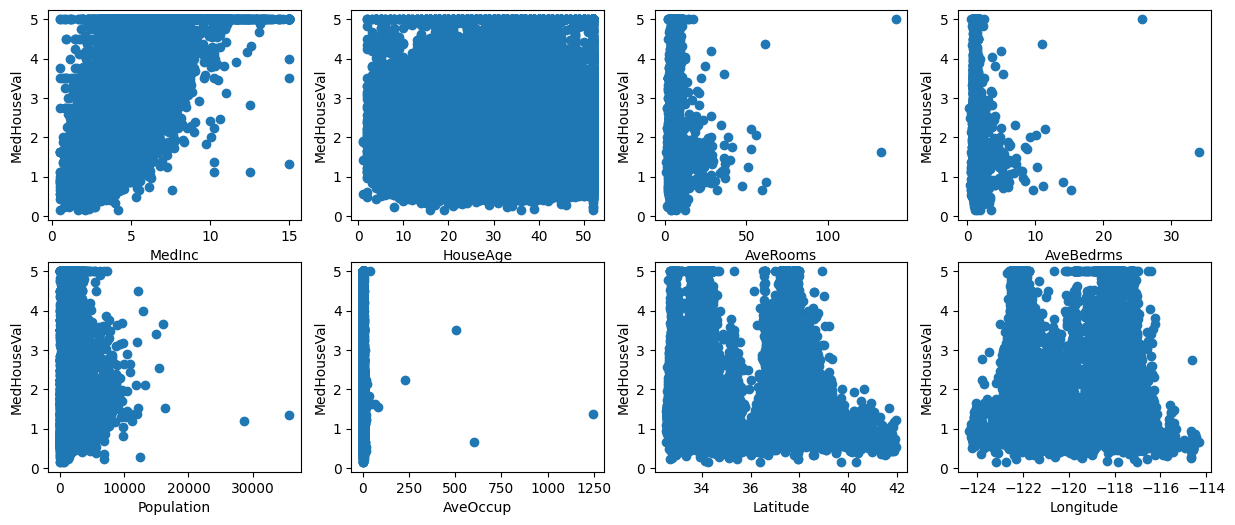

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
print(X.columns)
for i,name in enumerate(X.columns):
    print(i,name)
    axes[i].scatter(X[name],Y)
    axes[i].set_xlabel(name)
    axes[i].set_ylabel('MedHouseVal')

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
0 MedInc
1 HouseAge
2 AveRooms
3 AveBedrms
4 Population
5 AveOccup
6 Latitude
7 Longitude


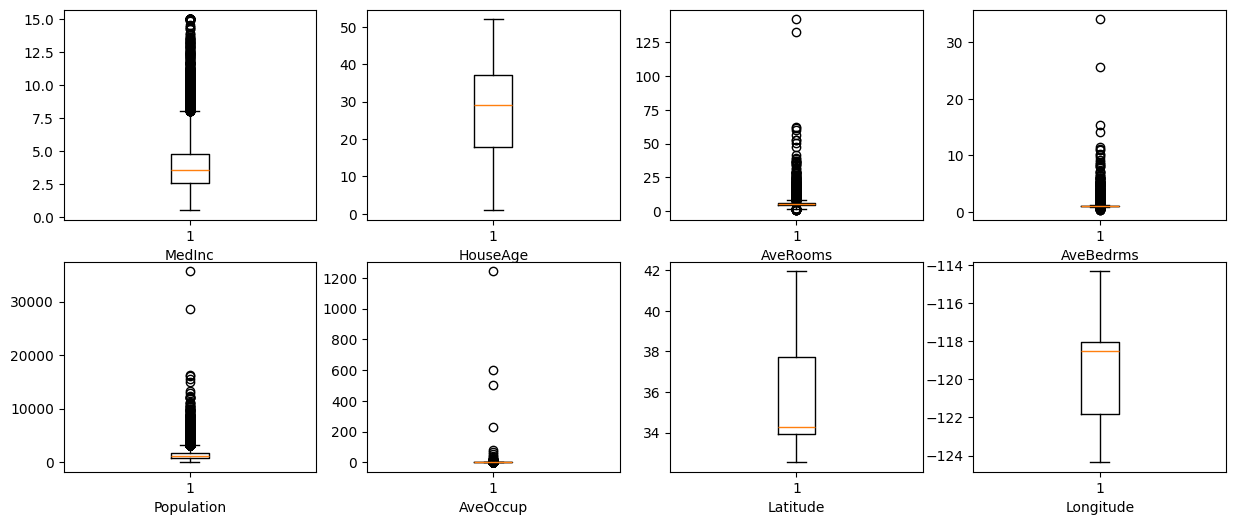

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
print(X.columns)
for i,name in enumerate(X.columns):
    print(i,name)
    axes[i].boxplot(X[name])
    axes[i].set_xlabel(name)


In [7]:
X.drop(columns=['Latitude','Longitude'], inplace = True)
df = pd.concat([X, Y], axis=1)
for i,name in enumerate(X.columns):
    print(i,name,end=':- ')
    q1 = X[name].quantile(0.25)
    q3 = X[name].quantile(0.75)
    iqr = q3-q1
    print(q1,q3,iqr)
    mi = q1-iqr*1.5
    ma = q3+iqr*1.5
    df.drop(index = df[(df[name]<mi) | (df[name]>ma)].index, inplace=True)
X,Y = df[X.columns], df['MedHouseVal']

0 MedInc:- 2.5633999999999997 4.74325 2.17985
1 HouseAge:- 18.0 37.0 19.0
2 AveRooms:- 4.440716235896959 6.052380952380952 1.6116647164839932
3 AveBedrms:- 1.006079046038478 1.099526066350711 0.09344702031223284
4 Population:- 787.0 1725.0 938.0
5 AveOccup:- 2.4297411475535755 3.2822609242736216 0.8525197767200461


C:\Users\rrpra\AppData\Local\Temp\ipykernel_22120\777473980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Latitude','Longitude'], inplace = True)


0 MedInc
1 HouseAge
2 AveRooms
3 AveBedrms
4 Population
5 AveOccup


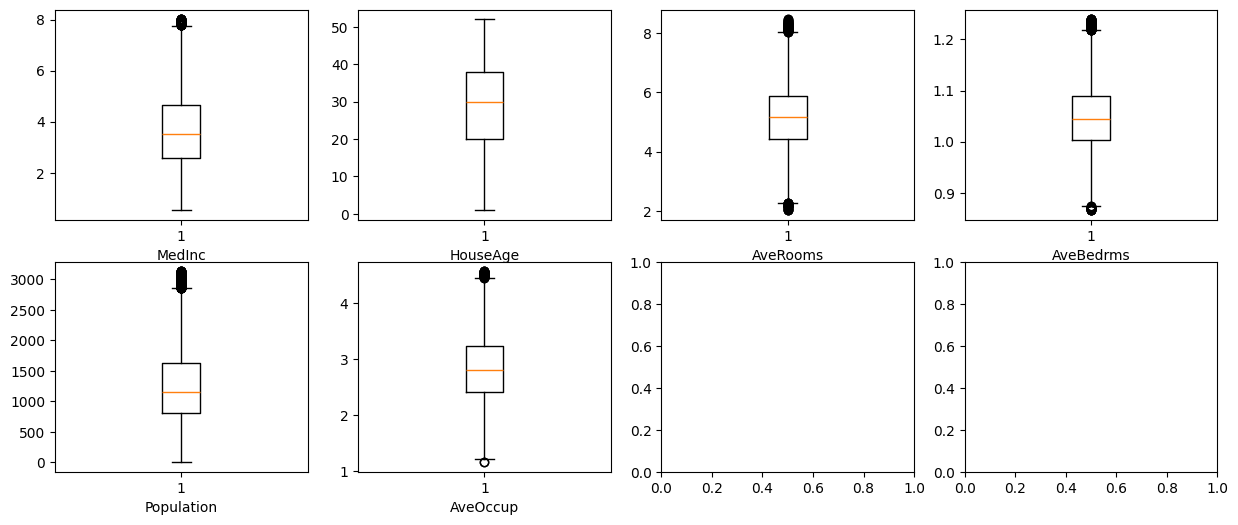

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for i,name in enumerate(X.columns):
    print(i,name)
    axes[i].boxplot(df[name])
    axes[i].set_xlabel(name)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')
0 MedInc
1 HouseAge
2 AveRooms
3 AveBedrms
4 Population
5 AveOccup


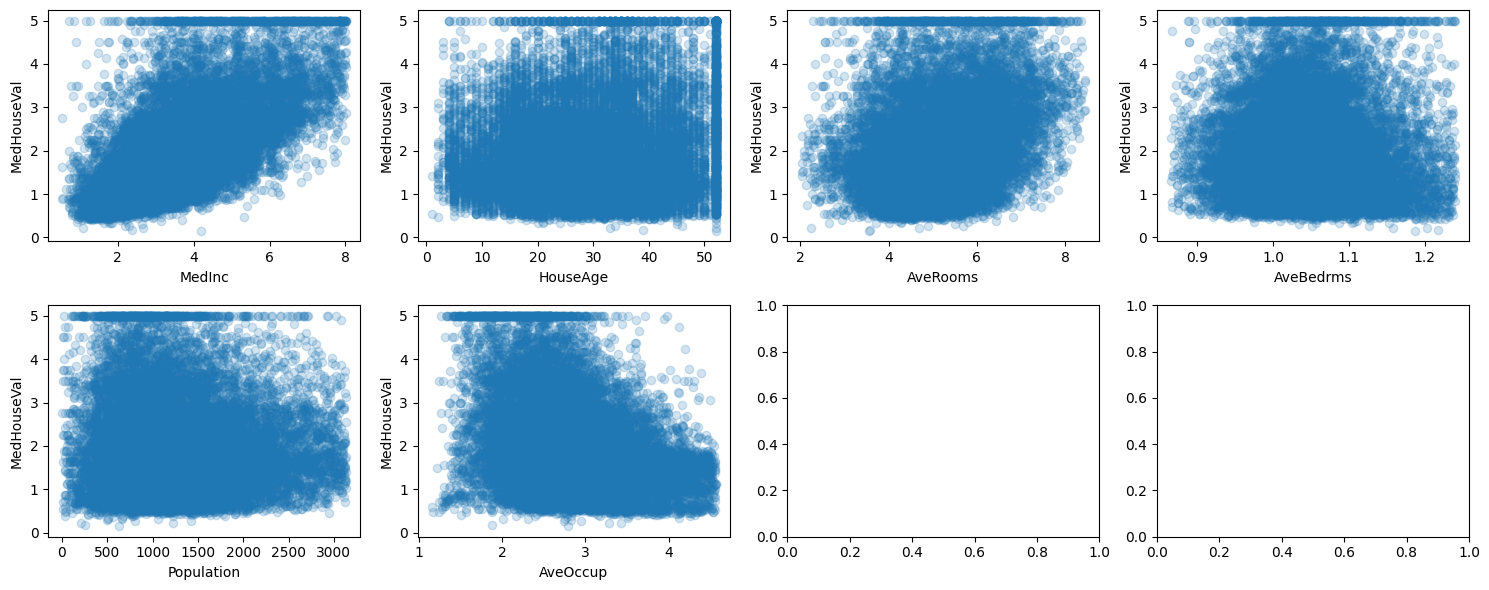

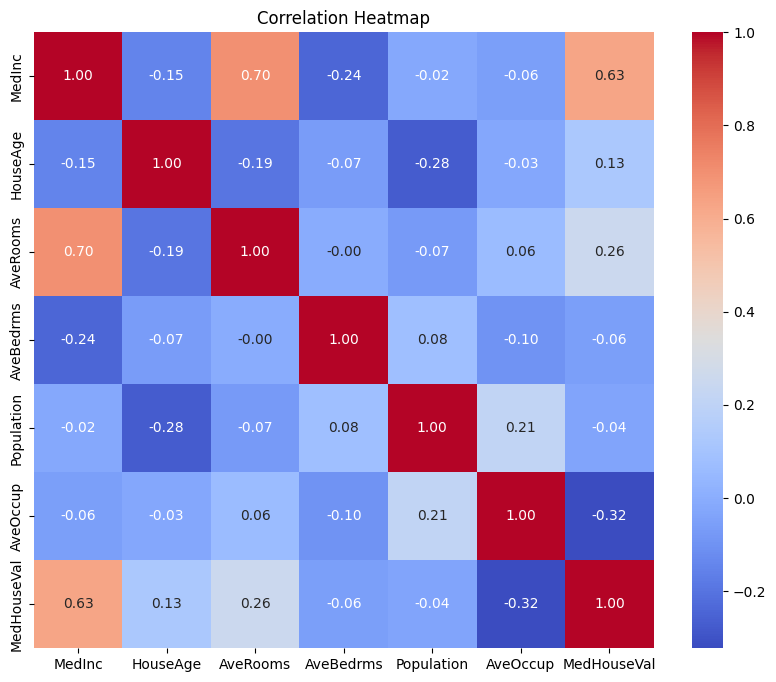

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
print(X.columns)
for i,name in enumerate(X.columns):
    print(i,name)
    axes[i].scatter(X[name],Y, alpha = 0.2)
    axes[i].set_xlabel(name)
    axes[i].set_ylabel('MedHouseVal')
plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, Y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 6.51473357e-01  1.95912822e-02 -3.15527626e-01  2.31887264e+00
  8.95588599e-05 -4.10343026e-01]
Intercept: -0.7203446519755468


In [11]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.4582096467350017
R-squared: 0.6124222995952802


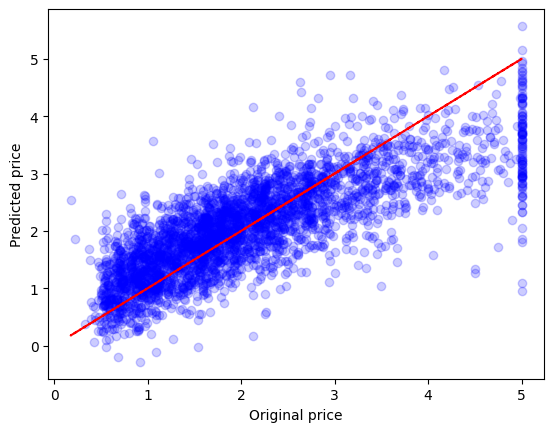

In [12]:
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual', alpha = 0.2)
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Original price")
plt.ylabel("Predicted price")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np



# Calculate metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

print(f"R-squared: {r2}")

Mean Squared Error (MSE): 0.4582096467350017
Mean Absolute Error (MAE): 0.5068809164356664
Root Mean Squared Error (RMSE): 0.6769118456158096
R-squared: 0.6124222995952802


In [14]:

medMedInc=3.533300
medHouseAge=30.000000
medAveRooms=5.153101
medAveBedrms=1.044371
medPopulation=1153.500000
medAveOccup=2.796167
def prepare_input(MedInc=medMedInc, HouseAge=medHouseAge, AveRooms=medAveBedrms, AveBedrms=medAveBedrms, Population=medPopulation, AveOccup=medAveOccup, Latitude=None, Longitude=None):
    
    inputs = [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup]
    
    input_array = np.array(inputs).reshape(1, -1)
    result = model.predict(input_array)
    return result
    

In [15]:
print(prepare_input(3.870671, 28.639486, 5.429000, 1.096675, 1425.476744, 3.001))

[2.08865346]


C:\Users\rrpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:

X.drop(['Population','AveBedrms'], axis =1, inplace=True)

C:\Users\rrpra\AppData\Local\Temp\ipykernel_22120\1207552951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Population','AveBedrms'], axis =1, inplace=True)


In [17]:
bins = [0,1, 2, 3, 4, 5, float('inf')]
labels = ['Very Very Low','Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Price_Category'] = pd.cut(df['MedHouseVal'], bins=bins, labels=labels)

<BarContainer object of 6 artists>

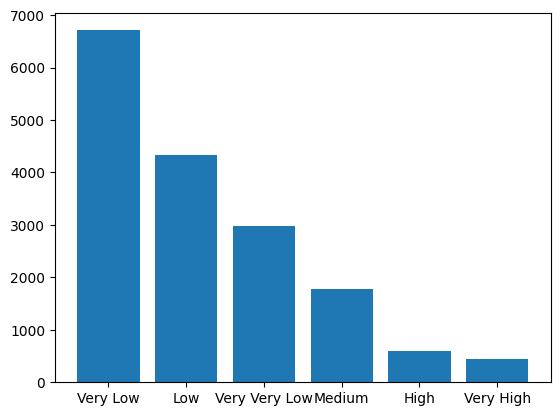

In [18]:
plt.bar(df['Price_Category'].value_counts().index,df['Price_Category'].value_counts())

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveOccup'], dtype='object')
0 MedInc
1 HouseAge
2 AveRooms
3 AveOccup


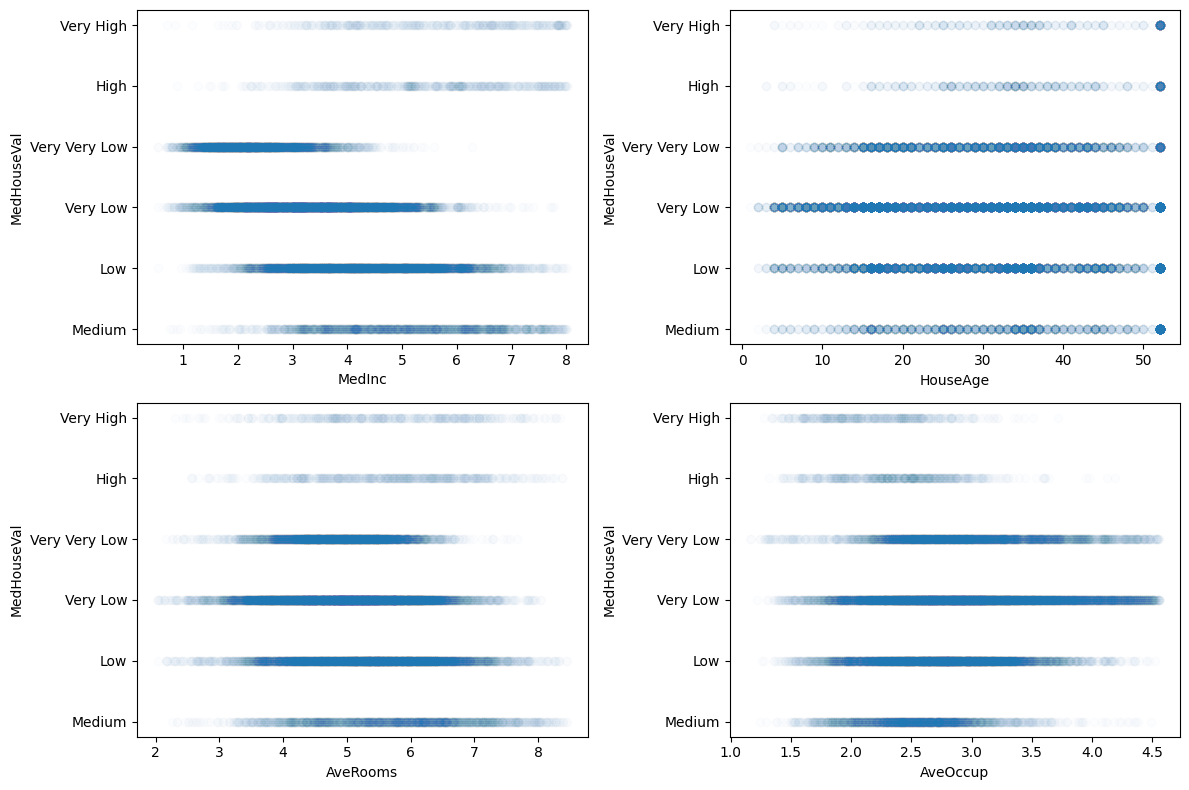

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
print(X.columns)
for i,name in enumerate(X.columns):
    print(i,name)
    axes[i].scatter(df[name],df['Price_Category'], alpha = 0.01)
    axes[i].set_xlabel(name)
    axes[i].set_ylabel('MedHouseVal')
plt.tight_layout()
plt.show()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveOccup'], dtype='object')
0 ('MedInc', 'HouseAge')
1 ('MedInc', 'AveRooms')
2 ('MedInc', 'AveOccup')
3 ('HouseAge', 'AveRooms')
4 ('HouseAge', 'AveOccup')
5 ('AveRooms', 'AveOccup')


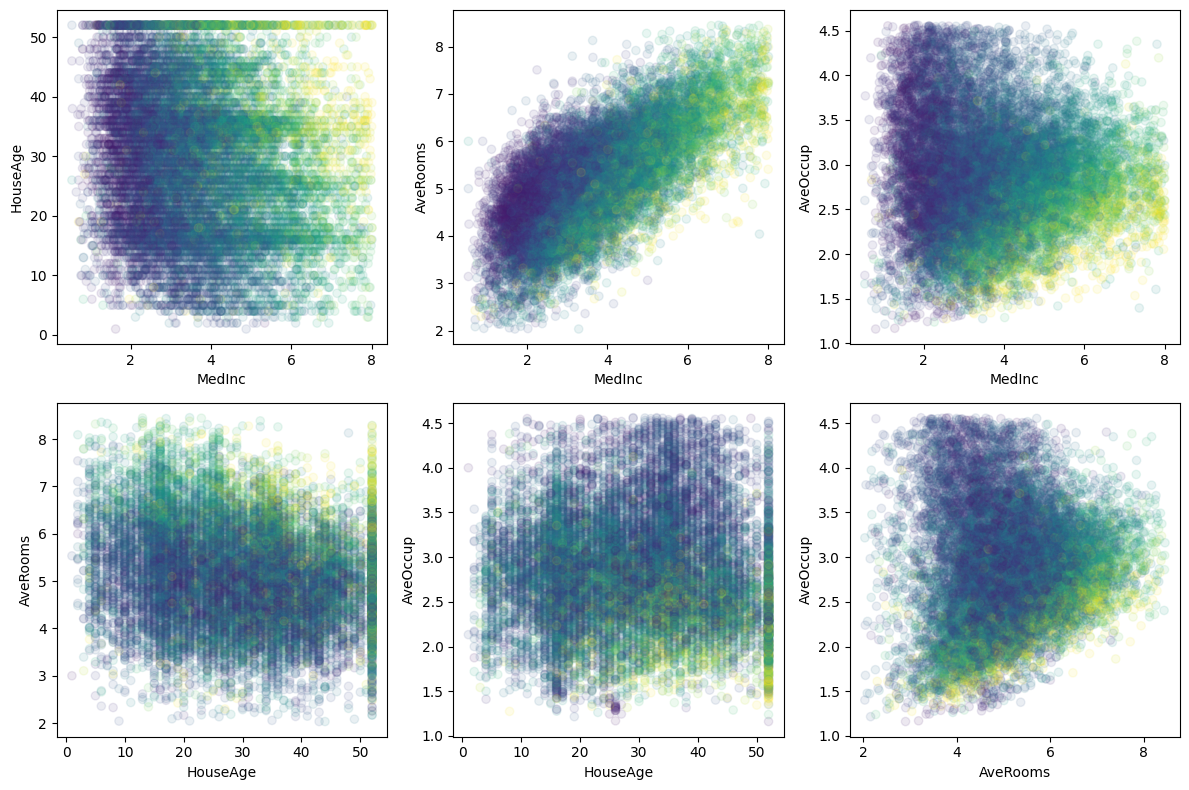

In [20]:
from itertools import combinations

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
print(X.columns)
comb_of_2 = list(combinations(X.columns, 2))
for i,name in enumerate(comb_of_2):
    print(i,name)
    axes[i].scatter(X[name[0]],X[name[1]],c=Y, alpha = 0.1)
    axes[i].set_xlabel(name[0])
    axes[i].set_ylabel(name[1])
plt.tight_layout()
plt.show()

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(df[X.columns],df['Price_Category'], test_size=0.2, random_state=42)


In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Initialize and train the SVM model
svm_model = SVC(kernel='poly', C=1, gamma='scale', probability=True)  # Kernel can be 'linear', 'poly', 'rbf', or 'sigmoid'
svm_model.fit(X_train, Y_train)


SVC(C=1, kernel='poly', probability=True)

In [25]:
# Make predictions
Y_pred = svm_model.predict(X_test)

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Classification Report:
                precision    recall  f1-score   support

         High       0.40      0.02      0.03       132
          Low       0.44      0.30      0.36       863
       Medium       0.42      0.20      0.27       351
    Very High       0.51      0.27      0.35        82
     Very Low       0.53      0.87      0.65      1358
Very Very Low       0.68      0.38      0.48       583

     accuracy                           0.52      3369
    macro avg       0.50      0.34      0.36      3369
 weighted avg       0.51      0.52      0.48      3369

Confusion Matrix:
 [[   2   48   47   12   22    1]
 [   2  262   26    0  567    6]
 [   0  162   69    8  111    1]
 [   1   28   19   22   11    1]
 [   0   79    4    1 1178   96]
 [   0   10    0    0  353  220]]


In [28]:
n=len(Y_test)
tt=0
tf=0
ft=0
ff=0
Y_test=np.array(Y_test)
Y_pred=np.array(Y_pred)
for i in range(n):
    x = Y_test[i] == Y_pred[i]
    tt += x
    tf += not(x)

In [30]:
print(tt)
print(tf)
print(n)

1753
1616
3369
